In [2]:
import pandas as pd
import numpy as np


In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [4]:
# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

# Check the number of rows and columns
print(customers.shape)
print(products.shape)
print(transactions.shape)


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
# Count missing values in each column
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# Check for duplicates in each dataset
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


0
0
0


In [7]:
# Display data types of each column
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [8]:
# Summary of numerical columns
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Summary of categorical columns
print(customers.describe(include=['object']))
print(products.describe(include=['object']))
print(transactions.describe(include=['object']))



       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0054  Alexander Barker  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
u

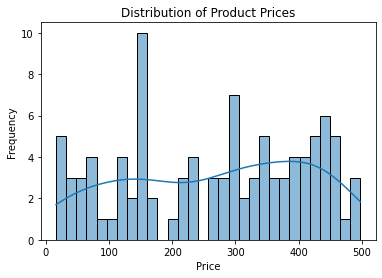

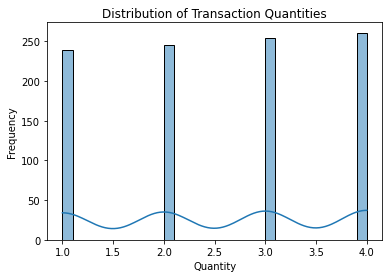

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Product Prices
sns.histplot(products['Price'], kde=True, bins=30)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of Transaction Quantities
sns.histplot(transactions['Quantity'], kde=True, bins=30)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


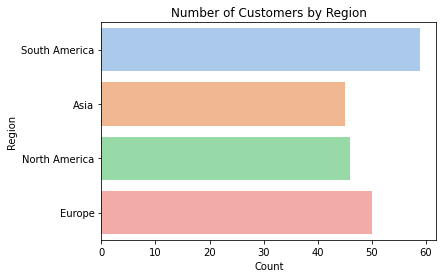

In [10]:
# Count plot for regions in Customers dataset
sns.countplot(y='Region', data=customers, palette='pastel')
plt.title('Number of Customers by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


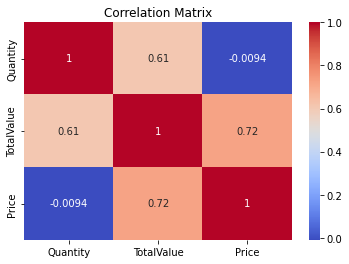

In [11]:
# Correlation matrix
correlation_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()

# Heatmap for visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


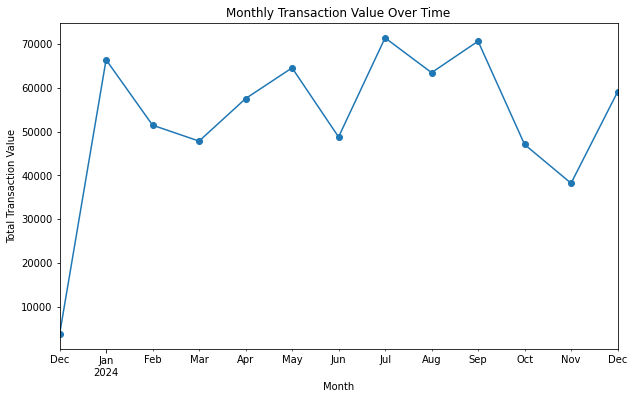

In [12]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Group transactions by month
monthly_transactions = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot trends
monthly_transactions.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.show()


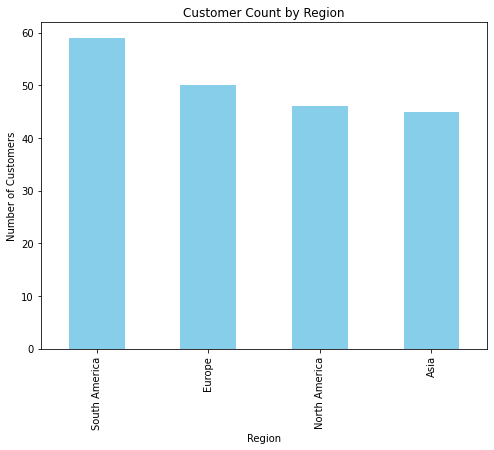

In [13]:
# Count customers by region
customer_count_by_region = customers['Region'].value_counts()

# Plot
customer_count_by_region.plot(kind='bar', figsize=(8, 6), color='skyblue', title='Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


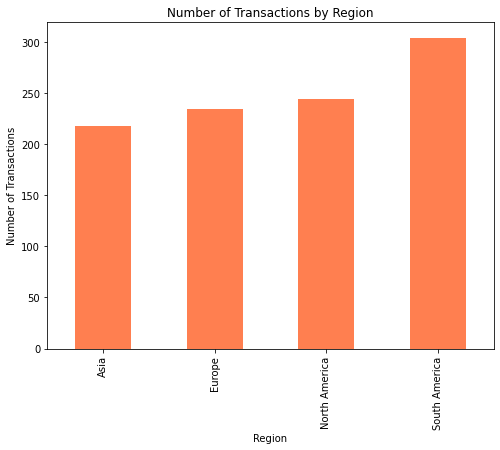

In [14]:
# Merge transactions and customers to get region information
transactions_with_region = transactions.merge(customers, on='CustomerID')

# Total transactions by region
transactions_by_region = transactions_with_region.groupby('Region')['TransactionID'].count()

# Plot
transactions_by_region.plot(kind='bar', figsize=(8, 6), color='coral', title='Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()


In [15]:
top_expensive_products = products.nlargest(5, 'Price')
print(top_expensive_products[['ProductName', 'Price']])


             ProductName   Price
74      TechPro Textbook  497.76
31    BookWorld Cookbook  488.63
44     SoundWave T-Shirt  481.78
16   ActiveWear Textbook  469.77
36  SoundWave Smartwatch  459.86


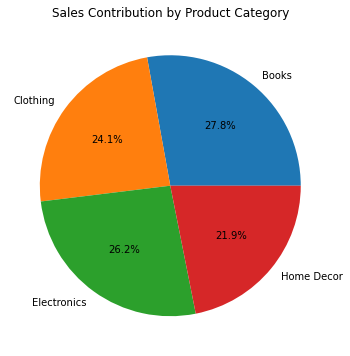

In [16]:
# Merge transactions and products to get category information
transactions_with_category = transactions.merge(products, on='ProductID')

# Calculate total sales by category
sales_by_category = transactions_with_category.groupby('Category')['TotalValue'].sum()

# Plot
sales_by_category.plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%', title='Sales Contribution by Product Category')
plt.ylabel('')  # Hides y-axis label for better aesthetics
plt.show()


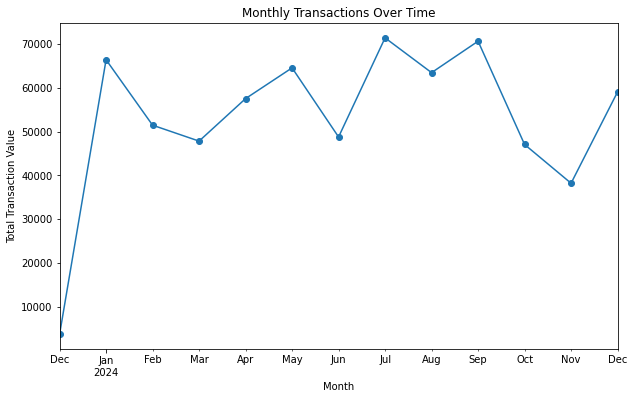

In [17]:
# Group by month and sum total values
monthly_sales = transactions_with_region.groupby(transactions_with_region['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot trend
monthly_sales.plot(kind='line', figsize=(10, 6), marker='o', title='Monthly Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.show()


In [18]:
# Calculate median price
median_price = products['Price'].median()

# Products close to the median price
optimal_price_products = products[(products['Price'] >= median_price * 0.9) & (products['Price'] <= median_price * 1.1)]
print(optimal_price_products[['ProductName', 'Price']])


                        ProductName   Price
24          ActiveWear Cookware Set  284.62
29              ActiveWear Cookbook  277.86
52                      TechPro Rug  274.94
58                  SoundWave Jeans  303.20
66  ComfortLiving Bluetooth Speaker  300.68
73              SoundWave Desk Lamp  295.58
76            ActiveWear Smartwatch  265.51
79                ActiveWear Jacket  303.50
86            TechPro Running Shoes  290.17
92                     TechPro Vase  304.94
95             SoundWave Headphones  307.47
96               BookWorld Cookbook  319.34
97                 SoundWave Laptop  299.93


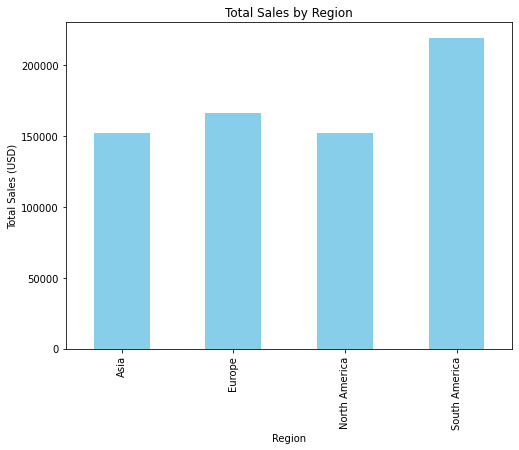

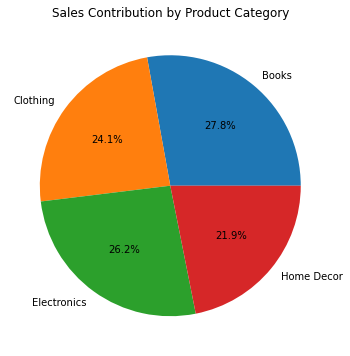

Correlation between Quantity and TotalValue:
             Quantity  TotalValue
Quantity    1.000000    0.609972
TotalValue  0.609972    1.000000


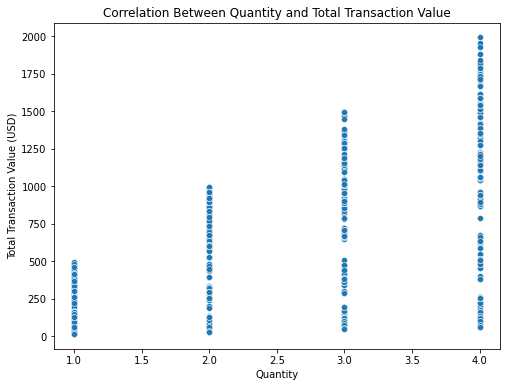

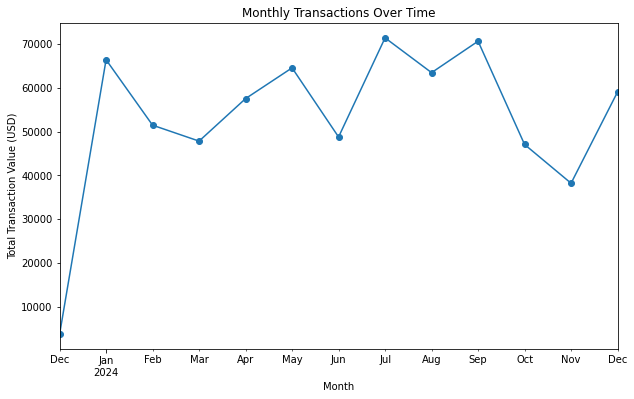

Products in the Optimal Price Range ($270-$300):
                        ProductName   Price
24          ActiveWear Cookware Set  284.62
29              ActiveWear Cookbook  277.86
52                      TechPro Rug  274.94
58                  SoundWave Jeans  303.20
66  ComfortLiving Bluetooth Speaker  300.68
73              SoundWave Desk Lamp  295.58
76            ActiveWear Smartwatch  265.51
79                ActiveWear Jacket  303.50
86            TechPro Running Shoes  290.17
92                     TechPro Vase  304.94
95             SoundWave Headphones  307.47
96               BookWorld Cookbook  319.34
97                 SoundWave Laptop  299.93


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Business Insight 1: Regional Sales Contribution
transactions_with_region = transactions.merge(customers, on='CustomerID')
transactions_by_region = transactions_with_region.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
transactions_by_region.plot(kind='bar', color='skyblue', title='Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

# Business Insight 2: Best-Performing Product Categories
transactions_with_category = transactions.merge(products, on='ProductID')
sales_by_category = transactions_with_category.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
sales_by_category.plot(kind='pie', autopct='%1.1f%%', title='Sales Contribution by Product Category')
plt.ylabel('')  # Hides y-axis label for aesthetics
plt.show()

# Business Insight 3: Bulk Purchasing Drives Revenue
correlation = transactions[['Quantity', 'TotalValue']].corr()
print("Correlation between Quantity and TotalValue:\n", correlation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions)
plt.title('Correlation Between Quantity and Total Transaction Value')
plt.xlabel('Quantity')
plt.ylabel('Total Transaction Value (USD)')
plt.show()

# Business Insight 4: Seasonal Demand Spikes
monthly_sales = transactions_with_region.groupby(transactions_with_region['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value (USD)')
plt.show()

# Business Insight 5: Optimal Product Pricing
median_price = products['Price'].median()
optimal_price_products = products[(products['Price'] >= median_price * 0.9) & (products['Price'] <= median_price * 1.1)]
print("Products in the Optimal Price Range ($270-$300):")
print(optimal_price_products[['ProductName', 'Price']])

# Save key outputs
optimal_price_products.to_csv('Optimal_Priced_Products.csv', index=False)
sales_by_category.to_csv('Sales_By_Category.csv')
transactions_by_region.to_csv('Sales_By_Region.csv')
